# Project: Bank Marketing Campaigns for Term Deposits 

## Problem Formulation

This data set contains records relevant to a direct marketing campaign of a Portuguese banking institution.Our client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

We are provided with the client data such as age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc.

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository.

(Sourse of the data : https://archive.ics.uci.edu/ml/datasets/bank+marketing).

Number of Instances: 41188 

Number of Attributes: 21

## Problem Statement

Leverage the given data set to build an End-to-End Data Science Project and Predict whether a customer is subscribing the term deposit or not.

## Hypothesis Generation

This is one of the important stages in any Data Science/Machine Learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can highly affect the people who choose term deposits :

- **Age:** Mostly elder people doesn't take risk so they might prefer term deposits over any other.

- **Income:** Income of a person increases as he/she gains experience and thus, people with higher age tend to have higher income for the same occupation. Higher income people might interested in investing.

- **Occupation:** People working in 'Tech-support', 'Sales' & 'Exec-managerial' will surely have good salary and they might consider investing more than other people.

- **Marital Status:** People who are married tend to invest more than unmarried people  


## Steps to follow

It is a Binary Classification Problem

- **General Overview:** Have a General Overview of the data
- **EDA:** Perform Exploratory Data Analysis(EDA) to gain more clear insights of the data
- **Data Preprocessing:** With the information gained after performing EDA, Preprocess the Data accordingly
- **Model Building:** Once the data is properly cleaned and preprocessed, use this data to build a Machine Learning
- **Hyperparameter Tuning:** Tune the Hyperparameters of the best performing model
- **Model Performance:** Assess the Performance of the Model on the Testing data set
- **Save the model:** Save the Best Performing Model
- **Predictions:** Make Predictions on the Testing data set

### After performing all the steps above, create a Web App and deploy the same on Cloud Platforms
 

In [1]:
# For performing any kind of Mathematical Operations
import numpy as np
# For dealing with DataFrames
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
# For visualizing the plottings better
%matplotlib inline
# For Data Visualization
import seaborn as sns

# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

# Saving the model
import pickle

## to ignore waarning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv


In [2]:
data = pd.read_csv('../input/bank-marketing-campaigns-dataset/bank-additional-full.csv' ,sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df = data.copy()

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1. Having an Overview of the data set

1.1. The search for missings and duplicates

1.2. Evaluate statistical correlation between features. Pearson Correlation coefficient.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### Rename Columns

Renaming the columns to have the same formatting columns names. Replace the column name that contains '.' with '_'.

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace('.', '_', regex = False)

# columns after rename

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [7]:
# checking whether the data data is balanced or not 

df['y'].value_counts()

# it seems the data is higly imbalanced 

no     36548
yes     4640
Name: y, dtype: int64

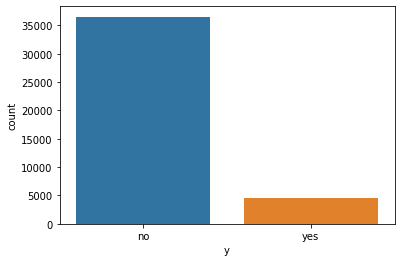

In [8]:
# Visualizing the distribution of the Target variable

sns.countplot(df['y'])
plt.show()

In [9]:
df.shape

(41188, 21)

In [10]:
# People who are not ready to take the deposit 

100*(36548/41188)

88.73458288821988

In [11]:
# People who are ready to take the deposit 

100*(4640/41188)

11.265417111780131

##### There is almost a 88% - 12% distribution of the Target values which seems quite imbalanced, so we have to handle the imbalanced data as well.

### 1.1. Checking the missing values in the data

In [12]:
df.isnull().sum().sum()

0

Fortunately, there are no missing values. If there were missing values we will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

### 1.2. Checking for Correlation among the Predictors

In [13]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

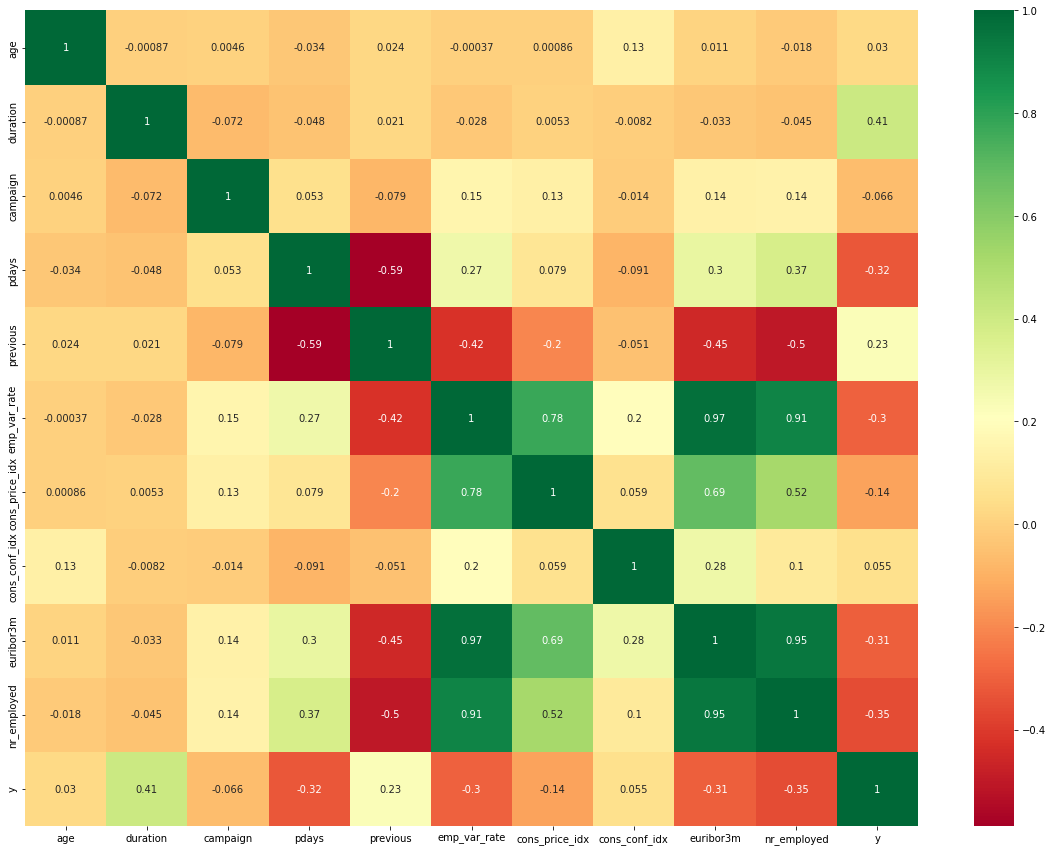

In [14]:
# Correlation Heatmap

corr = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

#####  From correlation matrix we observed the below

1. Most correlated with target feature is call duration. So we need to transform it to reduce the influence

2. Number of employees(nr.employed) is highly correlated with employee variation rate and euribor3m and cons.price.idx

3. euribor3m (Bank interest rate) is highly correlated with nr.employed and cons.price.idx and employee variation rate

4. Consumer price index is highly correlated with nr.employed and bank interest rate(euribor3m) and employee variation rate

5. Employee variation rate also correlates with nr.employed and the bank interest rates(euribor3m) and  cons.price.idx

6. Higly correlated features (nr.employed, euribor3m, employment rate, consumer price index) may describe clients state from different social-economic angles. Their variance might support model capacity for generalization. after doing some data analysis we need to decide which features to consider.

## 2. Data Visualization and Exploratory Data Analysis (EDA)

1. Univariate analysis
2. Bivariate analysis

### 2.1. Univariate Analysis

##### Plotting Bar Graphs in order to visualize to see the distributions of the variables

1. Numerical Variables:  age, campaign,duration, pdays,balance,previous, emp_var_rate, cons_price_idx , cons_conf_idx, euribor3m, nr_employed.

2. Categorical Variables: job,marital, default, education,housing,loan,contact,poutcome,month,deposit,day_of_week

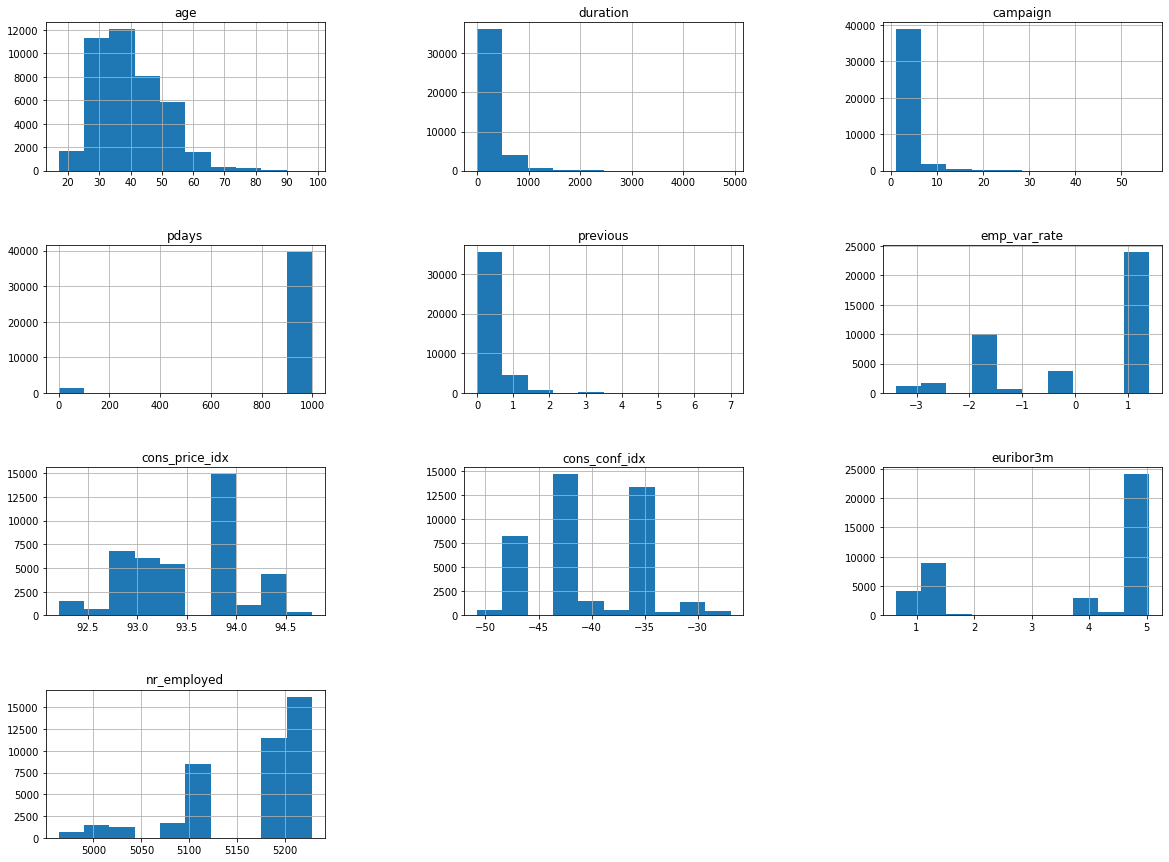

In [15]:
# 2.1.1. Numerical variables

header = ['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']
df.hist(column=header,figsize=(20,15))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

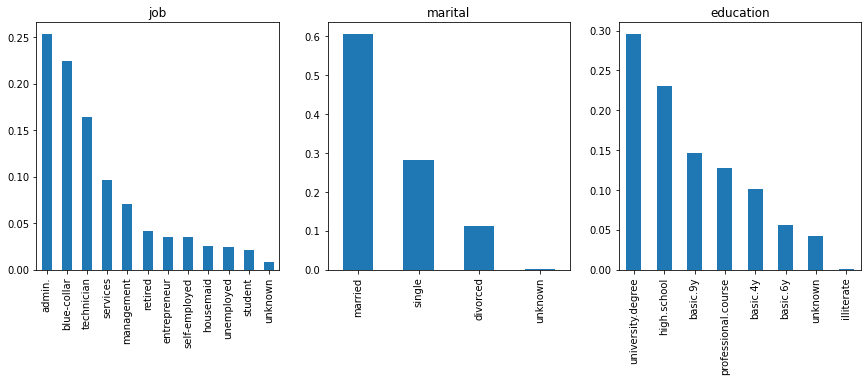

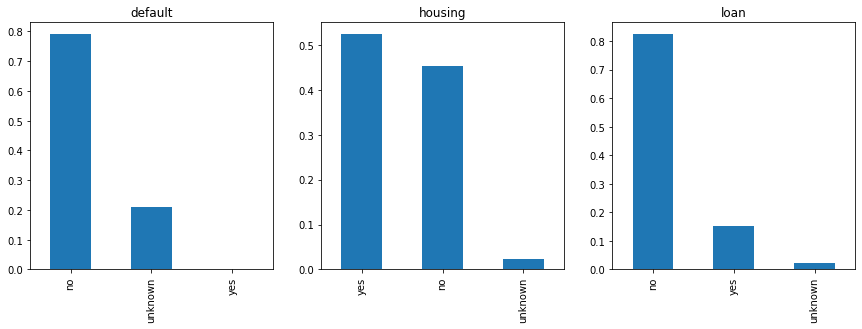

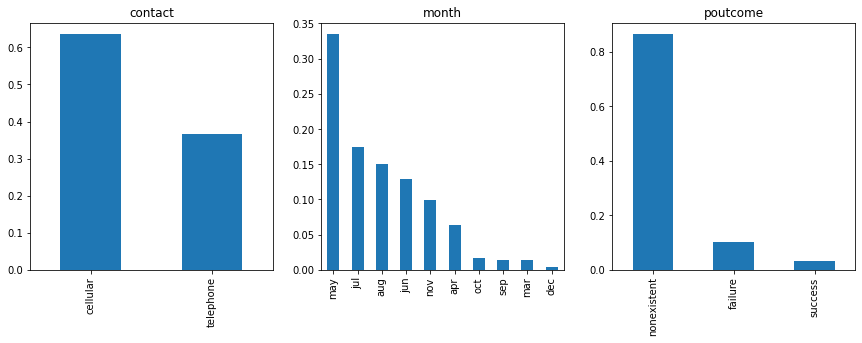

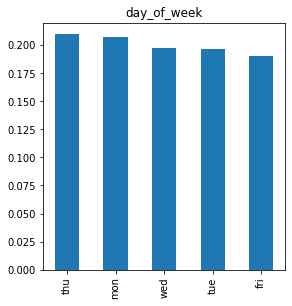

In [16]:
# 2.1.2. categorical variables

plt.figure(1)

plt.subplot(241)

df['job'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='job')

plt.subplot(242)
df['marital'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='marital')

plt.subplot(243)
df['education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='education')

plt.show()


plt.figure(2)

plt.subplot(241)
df['default'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='default' )

plt.subplot(242)
df['housing'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='housing')

plt.subplot(243)
df['loan'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='loan')

plt.show()

plt.figure(1)

plt.subplot(241)
df['contact'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='contact')

plt.subplot(242)
df['month'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='month')

plt.subplot(243)
df['poutcome'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='poutcome')

plt.show()

plt.figure(1)

plt.subplot(241)
df['day_of_week'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='day_of_week')

plt.show()

##### Replacing unknown class with mode of the particular feature 

Have you noticed the 'unknown' class in few features?

The features which are having unknown class is job, education, default, contact, poutcome. As we dont know the complete information about these class i will fill this class with mode of that particular feature.

In [17]:
df["job"].replace(["unknown"],df["job"].mode(),inplace = True)
df["education"].replace(["unknown"],df["education"].mode(),inplace = True)
df["default"].replace(["unknown"],df["default"].mode(),inplace = True)
df["housing"].replace(["unknown"],df["housing"].mode(),inplace = True)
df["loan"].replace(["unknown"],df["loan"].mode(),inplace = True)
df["contact"].replace(["unknown"],df["contact"].mode(),inplace = True)

### 2.2. Bivariate Analysis 

1. Categorical Variables: Bar charts - Goal - Analysis of frequency by category

2. Numerical Variables:  Box plots - Goal - Detect any outliers.
                       

### 2.2.1. Categorical Varibales :

Features : job,marital, default, education,housing,loan,contact,poutcome,month,deposit,day_of_week

#### a) job Feature
Administrative staff and technical specialists opened the deposit most of all and Customers with blue-collar and services jobs are less likely to subscribe for term deposit.

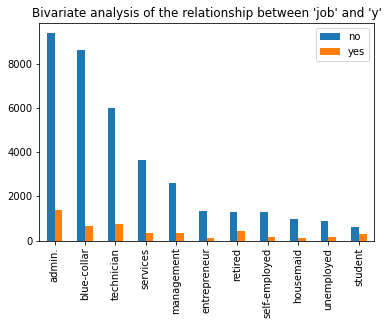

In [18]:
# Type of job and taget variable (y - term deposits)

j_df = pd.DataFrame()

j_df['no'] = df[df['y'] == 0]['job'].value_counts()
j_df['yes'] = df[df['y'] == 1]['job'].value_counts()

j_df.plot.bar(title = "Bivariate analysis of the relationship between 'job' and 'y'")

plt.show()

#### b) marital Feature

The bank was interested more on married people and single than divorced. The three variables are presented in descending order. Direct relation of samples wrt. the target column. The most "married" samples meant more subscribers.


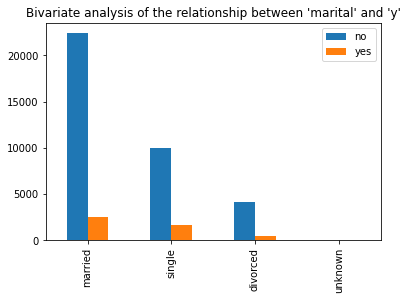

In [19]:
# marital status and taget variable (y - term deposits)

j_df = pd.DataFrame()

j_df['no'] = df[df['y'] == 0]['marital'].value_counts()
j_df['yes'] = df[df['y'] == 1]['marital'].value_counts()

j_df.plot.bar(title = "Bivariate analysis of the relationship between 'marital' and 'y'")

plt.show()

#### c) education Feature
More people with higher education degrees were subscribed. Proportional relationship. More secondary profiles means more term deposit were sold.

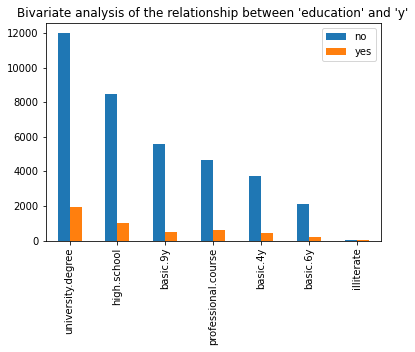

In [20]:
#education and taget variable (y - term deposits)

j_df = pd.DataFrame()

j_df['no'] = df[df['y'] == 0]['education'].value_counts()
j_df['yes'] = df[df['y'] == 1]['education'].value_counts()

j_df.plot.bar(title = "Bivariate analysis of the relationship between 'education' and 'y'")

plt.show()

#### d) default Feature

A high proportion of non-defaulters corresponds to the total of term deposit takers. It seems that it makes good sense that people with credit do not want to subscribe to a new bank offer.




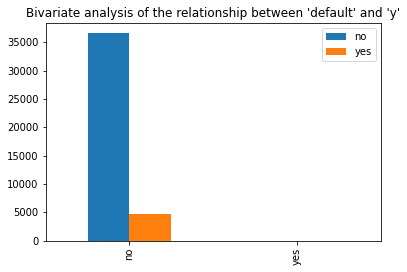

In [21]:
#Default and taget variable (y - term deposits)
j_df = pd.DataFrame()

j_df['no'] = df[df['y'] == 0]['default'].value_counts()
j_df['yes'] = df[df['y'] == 1]['default'].value_counts()

j_df.plot.bar(title = "Bivariate analysis of the relationship between 'default' and 'y'")

plt.show()

#### e)  housing Feature

There are more people with a housing loan. People without a housing loan are in higher proportion decided to got subscribed to a term deposit. Inverse proportion relationship.

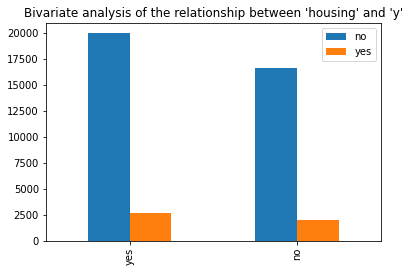

In [22]:
# Housing Default and taget variable (y - term deposits)
j_df = pd.DataFrame()

j_df['no'] = df[df['y'] == 0]['housing'].value_counts()
j_df['yes'] = df[df['y'] == 1]['housing'].value_counts()

j_df.plot.bar(title = "Bivariate analysis of the relationship between 'housing' and 'y'")

plt.show()

#### f) loan Feature
Likewise to housing loan, people without a personal loan were willing to got a deposit term (Higher proportion than housing loan). Just a few people with personal loan decided to got subscribed. Direct proportion relation.

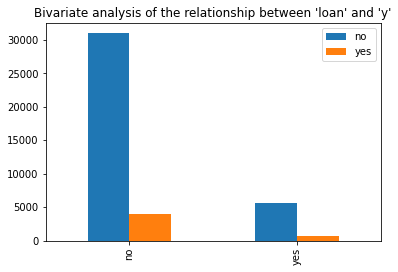

In [23]:
# Loan and taget variable (y - term deposits)
j_df = pd.DataFrame()

j_df['no'] = df[df['y'] == 0]['loan'].value_counts()
j_df['yes'] = df[df['y'] == 1]['loan'].value_counts()

j_df.plot.bar(title = "Bivariate analysis of the relationship between 'loan' and 'y'")

plt.show()

#### g) contact Feature

The direct ratio in this graph shows that people who were contacted by cellular got subscribed more to a deposit term. As for the "unknown" variable, an imputation technique will be applied to process it along with the other variables.

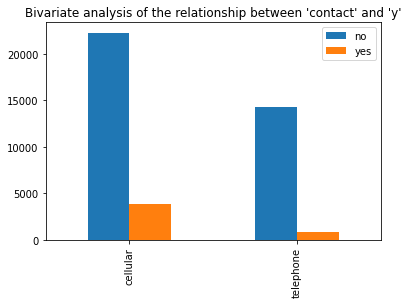

In [24]:
#type of contact and taget variable (y - term deposits)
j_df = pd.DataFrame()

j_df['no'] = df[df['y'] == 0]['contact'].value_counts()
j_df['yes'] = df[df['y'] == 1]['contact'].value_counts()

j_df.plot.bar(title = "Bivariate analysis of the relationship between 'contact' and 'y'")

plt.show()

#### h) month Feature
May got an slightly more subscribers than the other months. Regardless how many people is contacted the subscription average is almost the same with the exception of December and January. These months were got the fewest subscriptions. One possible reasons could be the fact the people go for holidays. (In the Americas people are used to take holidays in this period of the year). Based on the fact that the plot shows a proportional distribution of "yes" the "month" feature will be removed since doesn't affect the outcome.

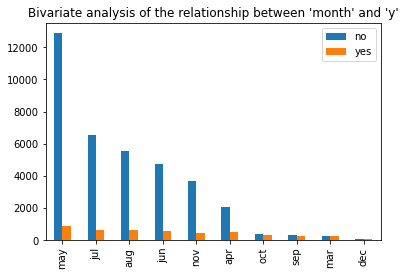

In [25]:
# month and taget variable (y - term deposits)
j_df = pd.DataFrame()

j_df['no'] = df[df['y'] == 0]['month'].value_counts()
j_df['yes'] = df[df['y'] == 1]['month'].value_counts()

j_df.plot.bar(title = "Bivariate analysis of the relationship between 'month' and 'y'")

plt.show()

#### i) poutcome Feature
This one correspond to the outcome of success of the previous marketing campaign. What does mean "unknown"? It means, that 78.7% of the people contacted did not know about the previous marketing campaign. The effrot on this campaign could have a positive impact in the last campaign. "success" has a very small percentage, but relevant for the analysis.

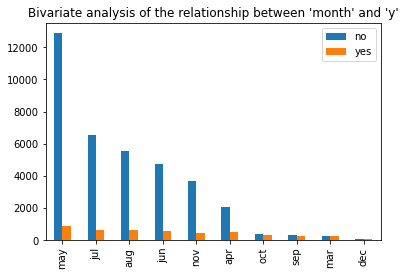

In [26]:
# poutcome and taget variable (y - term deposits)
j_df = pd.DataFrame()

j_df['no'] = df[df['y'] == 0]['month'].value_counts()
j_df['yes'] = df[df['y'] == 1]['month'].value_counts()

j_df.plot.bar(title = "Bivariate analysis of the relationship between 'month' and 'y'")

plt.show()

### 2.2.1. Numerical Variables: 

age, campaign,duration, pdays,previous, emp_var_rate, cons_price_idx , cons_conf_idx, euribor3m, nr_employed.

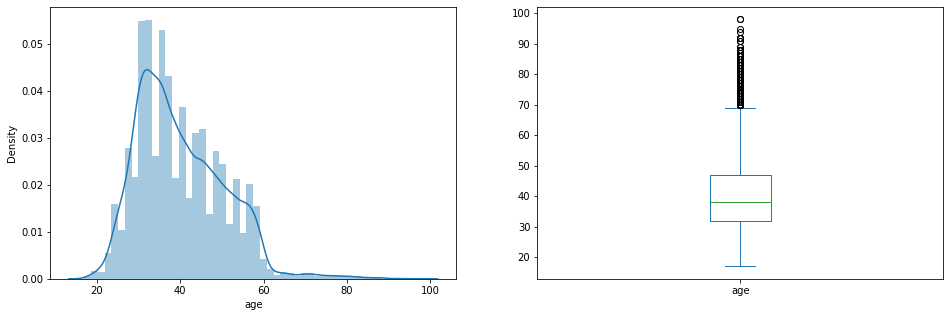

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['age'])

plt.subplot(122)
df['age'].plot.box(figsize=(16,5))
plt.show()

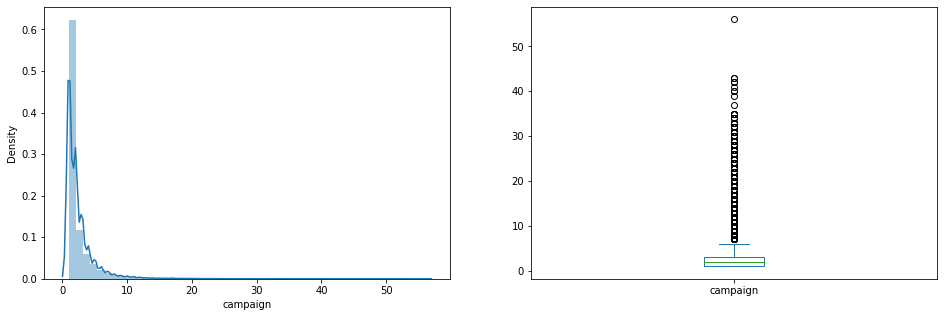

In [28]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['campaign'])

plt.subplot(122)
df['campaign'].plot.box(figsize=(16,5))
plt.show()

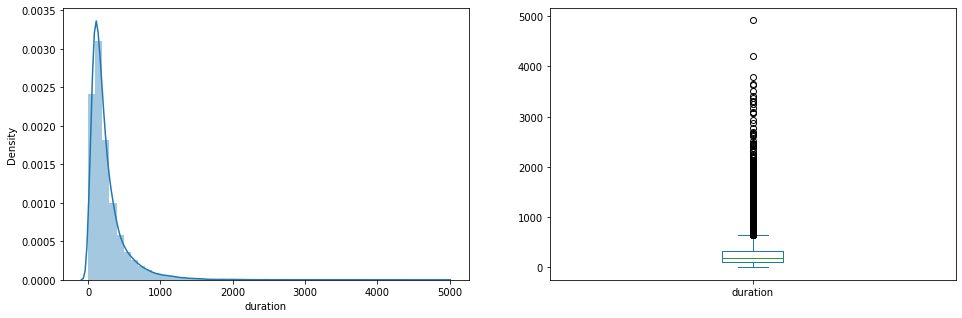

In [29]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['duration'])

plt.subplot(122)
df['duration'].plot.box(figsize=(16,5))
plt.show()

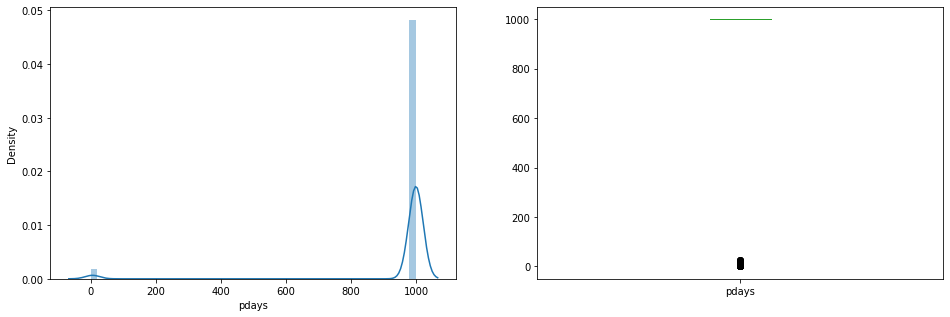

In [30]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['pdays'])

plt.subplot(122)
df['pdays'].plot.box(figsize=(16,5))
plt.show()

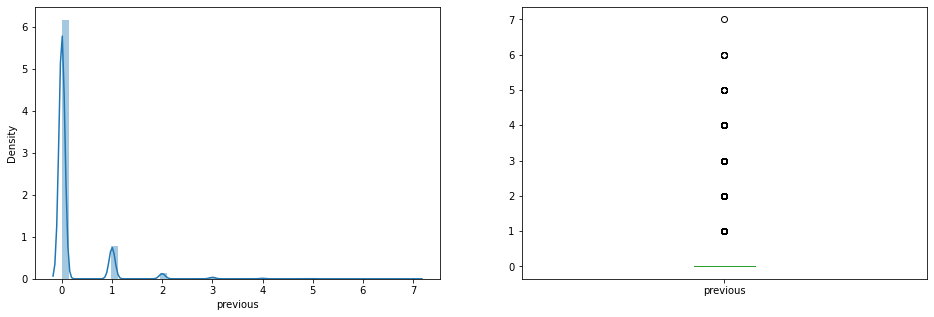

In [31]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['previous'])

plt.subplot(122)
df['previous'].plot.box(figsize=(16,5))
plt.show()

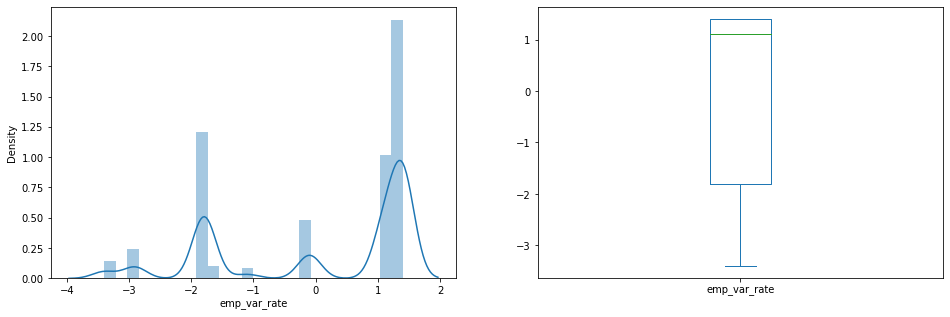

In [32]:

plt.figure(1)
plt.subplot(121)
sns.distplot(df['emp_var_rate'])

plt.subplot(122)
df['emp_var_rate'].plot.box(figsize=(16,5))
plt.show()


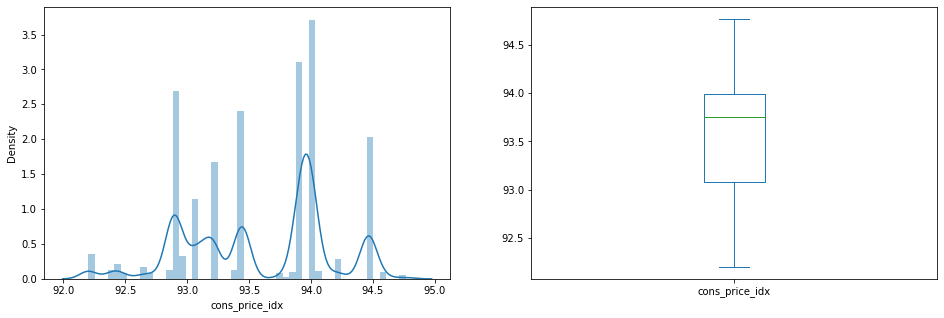

In [33]:

plt.figure(1)
plt.subplot(121)
sns.distplot(df['cons_price_idx'])

plt.subplot(122)
df['cons_price_idx'].plot.box(figsize=(16,5))
plt.show()

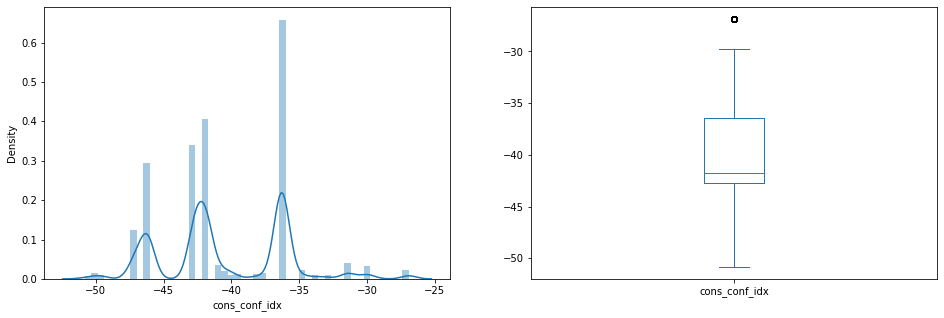

In [34]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['cons_conf_idx'])

plt.subplot(122)
df['cons_conf_idx'].plot.box(figsize=(16,5))
plt.show()

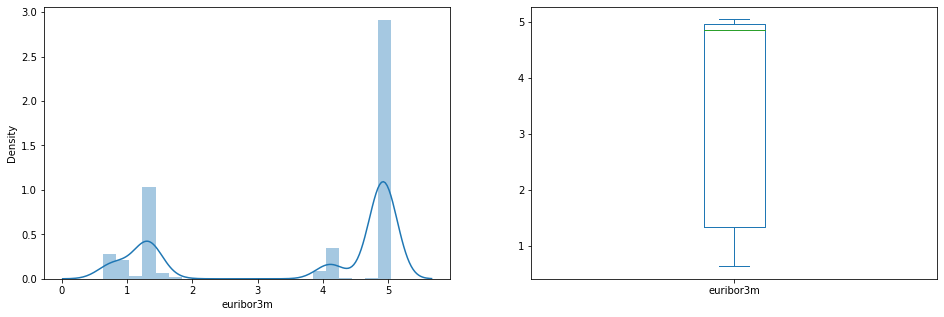

In [35]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['euribor3m'])

plt.subplot(122)
df['euribor3m'].plot.box(figsize=(16,5))
plt.show()

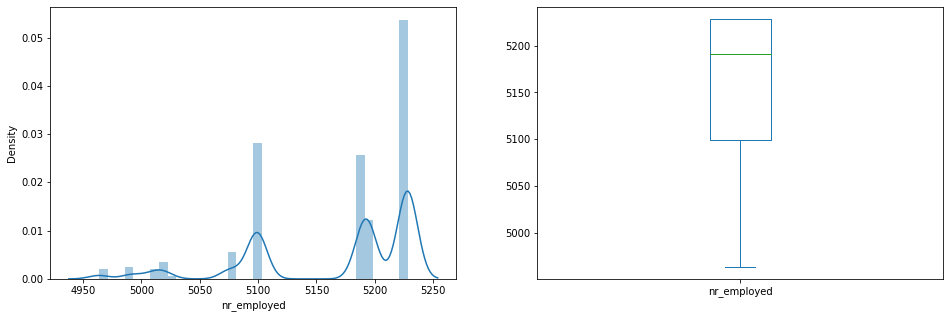

In [36]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['nr_employed'])

plt.subplot(122)
df['nr_employed'].plot.box(figsize=(16,5))
plt.show()

##### Conclusion after Exploratory Data Analysis (EDA) for Continuous Features:

1. For the age feature histogram displays a bell-shaped image, presents below, that has a left-shifted normal distribution. The population group is between 20 and 60. The box-plot shows an specific targeted age group between 30 and 50. 
2. Duration feature has an influence on the "y" outcome. We can see that when duration is between 0 and the 2 first minutes most of the people reject the offer. The remanent samples take a desicion in a range greater than 2 min up to 12 min. Just a very few take quite a long to both reject or accept the offer.
3. "Campaign" represenst the number of contacts performed during this campaign. Second, the people who were contacted a few times were the people who decided to subscribe a deposit term. Contrary to this, to try to contact people too many times is a waste of time.
4. pdays feature is the number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted). Almost most of the people were contacted for the first time. So, this feature will be removed since does not affect the outcome.
5. "previous" is the number of contacts performed before this campaign and for this client. As it is shown below, 36954 belong to 0. It means, 36954 were contacted for first time for this campaign. In addition, the box-plot is not present, it does not show a distribution, indicating that there is no relation wrt. the target. It will be removed from the analysis as well.
6. We can see there is a high employee variation rate which signifies that they have made the campaign when there were high shifts in job due to conditions of economy
7. The Consumer price index is also good which shows the leads where having good price to pay for goods and services may be that could be the reason to stimulate these leads into making a deposit and plant the idea of savings
8. Consumer confidence index is pretty low as they don't have much confidence on the fluctuating economy
9. The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In our case the interest rates are high for lending their loans
10. The number of employees were also at peak which can increase their income index that could be the reason the campaign targetted the leads who were employeed to make a deposit
11. Every feature contains some amount of Outliers (Anomalies) which needs to be handled well in order for our ML model to learn in a specific range of values




## 3. Train-Test Split

In [37]:
# deleting the unnecessary varibles from input data

X = df.drop(columns=[ 'pdays','month','cons_price_idx','loan','housing','emp_var_rate','y'])

X.head()

,age,job,marital,education,default,contact,day_of_week,duration,campaign,previous,poutcome,cons_conf_idx,euribor3m,nr_employed
0,56,housemaid,married,basic.4y,no,telephone,mon,261,1,0,nonexistent,-36.4,4.857,5191.0
1,57,services,married,high.school,no,telephone,mon,149,1,0,nonexistent,-36.4,4.857,5191.0
2,37,services,married,high.school,no,telephone,mon,226,1,0,nonexistent,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,telephone,mon,151,1,0,nonexistent,-36.4,4.857,5191.0
4,56,services,married,high.school,no,telephone,mon,307,1,0,nonexistent,-36.4,4.857,5191.0


In [38]:
y = df['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: uint8

In [39]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 4. Data Preprocessing

### 4.1 Creating a custom Transformer to handle the Outliers

This Transformer will assess the distribution of data within a feature i.e. whether the data is Normally distributed or not, and will accordingly handle the Outliers for this feature. It will continue to perform it's job separately for all the features within the provided data set.

If the data is Normally distributed: 3 Sigma method

If the data is Not Normally distributed: Inter-quartile Range(IQR) method


In [41]:
# My custom Transformer to handle the Outliers

from sklearn.base import TransformerMixin
import pandas as pd
pd.options.mode.chained_assignment = None  # To ignore the warning for not returning a copied DataFrame

class HandleOutliers(TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

        from scipy.stats import shapiro

        for col in X.columns : # Looping through all columns within the given DataFrame
            
            # If p-value < 0.05 == Skewed Distribution, else Normal Distribution
            
            if shapiro(X[col]).pvalue < 0.05 :

                # IQR method to handle outliers with Skewed Distribution
                q1 = X[col].quantile(0.25)
                q3 = X[col].quantile(0.75)

                iqr = q3 - q1

                lower_boundary = q1 - 1.5 * q1
                upper_boundary = q3 + 1.5 * q3

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary

                
            else :

                # 3-Sigma method to handle outliers with Normal Distribution
                lower_boundary = X[col].mean() - 3 * X[col].std()
                upper_boundary = X[col].mean() + 3 * X[col].std()

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary
                
        return X

### 4.2. Preprocessing the Train and Test Data separately

#### Encoding binary class features for train and test data

In [42]:
X_train['default'] = X_train['default'].map({'yes': 1, 'no': 0})
X_train['contact'] = X_train['contact'].map({'telephone': 1, 'cellular': 0})

In [43]:
X_test['default'] = X_test['default'].map({'yes': 1, 'no': 0})
X_test['contact'] = X_test['contact'].map({'telephone': 1, 'cellular': 0})

#### One Hot Encoding -  Nominal Features - train data

In [44]:
X_train = pd.get_dummies(X_train, columns=['job', 'marital', 'day_of_week', 'education', 'poutcome'])

X_train.head()


,age,default,contact,duration,campaign,previous,cons_conf_idx,euribor3m,nr_employed,job_admin.,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success
8505,43,0,1,28,4,0,-41.8,4.864,5228.1,0,...,1,0,0,0,0,0,0,0,1,0
28321,35,0,0,1190,1,0,-47.1,1.445,5099.1,1,...,0,0,0,1,0,0,0,0,1,0
2582,34,0,1,230,3,0,-36.4,4.856,5191.0,0,...,0,0,0,0,0,0,1,0,1,0
9407,49,0,1,190,4,0,-41.8,4.967,5228.1,0,...,1,0,0,0,0,0,0,0,1,0
33934,52,0,0,38,2,1,-46.2,1.281,5099.1,1,...,0,0,1,0,0,0,0,1,0,0


#### Nominal Features (To OneHot Encode) - test data

In [45]:
X_test = pd.get_dummies(X_test, columns=['job', 'marital', 'day_of_week','education', 'poutcome'])


X_test.head()

,age,default,contact,duration,campaign,previous,cons_conf_idx,euribor3m,nr_employed,job_admin.,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success
32884,57,0,0,371,1,1,-46.2,1.299,5099.1,0,...,0,0,0,1,0,0,0,1,0,0
3169,55,0,1,285,2,0,-36.4,4.860,5191.0,1,...,0,0,0,0,0,0,1,0,1,0
32206,33,0,0,52,1,1,-46.2,1.313,5099.1,0,...,0,0,1,0,0,0,0,1,0,0
9403,36,0,1,355,4,0,-41.8,4.967,5228.1,1,...,0,0,0,1,0,0,0,0,1,0
14020,27,0,0,189,2,0,-42.7,4.963,5228.1,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
# checking the no of columns of both train and test data are equal or not ?
(X_train.columns == X_test.columns).all()

True

## 5. Feature Importance

Let's check the feature importances and prune our features to make our model perform well.

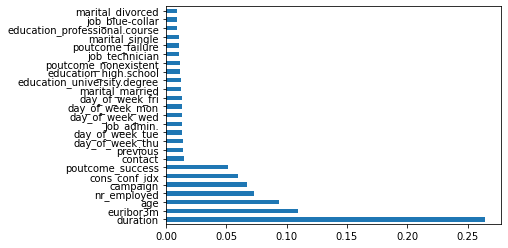

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

## 6. Standardizing the Data 

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7. Model Building

### 7.1. Logistic Regression Model implementation

In [49]:
lr = LogisticRegression(class_weight="balanced")

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.8526447436180387


#### Logistic Regression Model Performance


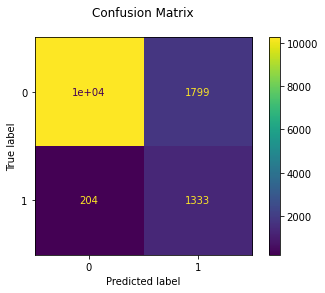

In [50]:
y_pred = lr_model.predict(X_test)
plot_confusion_matrix(lr_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [51]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.85      0.91     12056
           1       0.43      0.87      0.57      1537

    accuracy                           0.85     13593
   macro avg       0.70      0.86      0.74     13593
weighted avg       0.92      0.85      0.87     13593



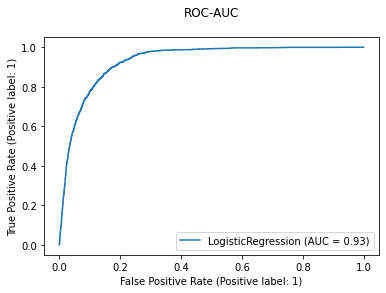

In [52]:
plot_roc_curve(lr_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

### 7.2. RandomForest Algorithm implemetation


In [53]:
rf = RandomForestClassifier(class_weight="balanced")
rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)


0.9105421908335173

#### Tuning the Hyperparameters of RandomForest Model


In [54]:
rf_params = {
    'n_estimators' : [50,100,130,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]
    
}

In [55]:
rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=5)

In [56]:
rf_best_model = rf_rs.fit(X_train, y_train)

In [57]:
rf_best_model.score(X_test, y_test)

0.8396233355403516

In [58]:
rf_best_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 20,
 'max_leaf_nodes': None,
 'max_depth': 4}

In [59]:
rf_best_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=20, min_samples_split=4,
                       n_estimators=50)

In [60]:
y_pred = rf_best_model.predict(X_test)

#### Random Forest Model Performance



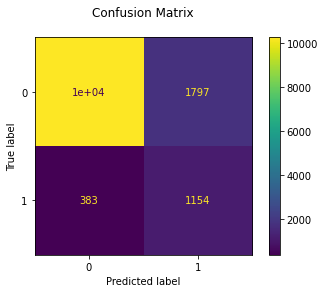

In [61]:
plot_confusion_matrix(rf_best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [62]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.85      0.90     12056
           1       0.39      0.75      0.51      1537

    accuracy                           0.84     13593
   macro avg       0.68      0.80      0.71     13593
weighted avg       0.90      0.84      0.86     13593



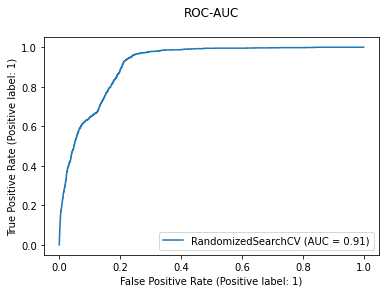

In [63]:
plot_roc_curve(rf_best_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()


### 7.3. AdaBoost Model implementation

In [64]:
ad = AdaBoostClassifier()
ad_model = rf.fit(X_train, y_train)
ad_model.score(X_test, y_test)

0.9097329507834915

#### AdaBoost Model Performance


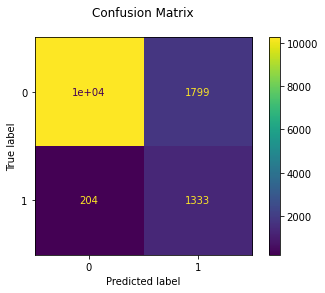

In [65]:
y_pred = lr_model.predict(X_test)
plot_confusion_matrix(lr_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [66]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.85      0.91     12056
           1       0.43      0.87      0.57      1537

    accuracy                           0.85     13593
   macro avg       0.70      0.86      0.74     13593
weighted avg       0.92      0.85      0.87     13593



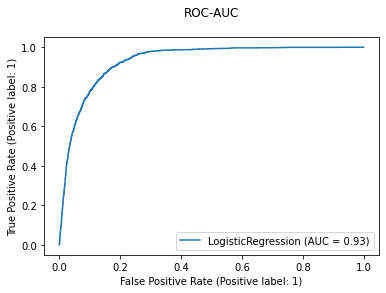

In [67]:
plot_roc_curve(lr_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

## 8. What general recommendations can be offered for a successful marketing company in the future?

From the EDA and model selection part we can clearly identify duration playing an important attribute in defining the outcome of our dataset. It is absolute that the more the leads are interested in starting a deposit will have higher number of calls and the call duration will be higher than the average. We have also figured out that job and education also acts as a crucial deciding factor and influences the outcome alot.

Here are the few recommendations for the bank than can help improve the deposit rate

Classify job roles based on corporate tiers and approach all tier 1 employees within few days after the campaign commences

Listen to the leads and extract more information to deliver the best deposit plan, which can increase the duration of calls and that can lead to a deposit

Approaching the leads during the start of new bank period(May-July) will be a good choice as many have shown positive results from data history

Tune the campaign according to the national econometrics, don't chanelize the expenses on campaign when the national economy is performing poor